In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set(color_codes=True)
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.preprocessing import StandardScaler

In [47]:
# lili
#data = pd.read_csv('lili.csv', sep=',',engine='python')
#fan
#data = pd.read_excel('fan.xlsx')
# huilin
data = pd.read_csv('huilin.csv', sep=',',engine='python')
df = data

In [48]:
# remove nan row
isnan = df['skin'].apply(np.isnan)
notnan = np.invert(isnan)
index = df['skin'].index[notnan]
data_new = data.iloc[index]
#lili
# lili_new = data_new[['temperature','humidity','skin','sensation','comfort']]
# lili_new.to_csv('lili_new.csv')

#huilin
#huilin_new = data_new[['temperature','humidity','skin','sensation','comfort']]
#huilin_new.to_csv('huilin_new.csv')

# get features and thermal sensation
#data_new = pd.read_excel('raw_comf.xlsx')
y = data_new['sensation']
#z = data_new['comfort']
#x = data_new[['temperature','humidity','skin']]
for i in range(7):
    print(i-3)
    print(np.shape(np.where(y==(i-3))))

-3
(1, 4)
-2
(1, 6)
-1
(1, 13)
0
(1, 86)
1
(1, 48)
2
(1, 28)
3
(1, 11)


In [60]:
data_new = df.dropna(subset=['sensation','comfort','skin','humidity','temperature'])
y = data_new['sensation']
z = data_new['comfort']
x = data_new[['temperature','humidity','skin']]
x_clo = df.dropna(subset=['skin','clothing','humidity','temperature'])

In [67]:
#x = x_clo
X_train, X_test, Y_train, Y_test = train_test_split(
     x, y, test_size=0.2, random_state=0)
len(X_train)

156

# Difference

In [62]:
def diff(x):
    grad = x['skin']
    first = grad[0:len(grad)-1]
    sec = grad[1:]
    diff_skin = []
    for i in range(len(first)):
        diff_skin.append(sec.iloc[i]-first.iloc[i])
    diff_skin = pd.DataFrame(np.array(diff_skin),columns=['diff_skin'])
    temp = pd.DataFrame(np.array(x['temperature'][1:]),columns=['temperature'])
    humid = pd.DataFrame(np.array(x['humidity'][1:]),columns=['humidity'])
    #clo = pd.DataFrame(np.array(x['clothing'][1:]),columns=['clothing'])
#     sens = pd.DataFrame(np.array(x['sensation'][1:]),columns=['sensation'])
#     com = pd.DataFrame(np.array(x['comfort'][1:]),columns=['comfort'])
    skin = pd.DataFrame(np.array(x['skin'][1:]),columns=['skin'])
    xxx = temp.join(humid).join(skin).join(diff_skin)
    return xxx

In [63]:
xxx_train = diff(X_train)
xxx_test = diff(X_test)
X_train = xxx_train
X_test = xxx_test
Y_test = Y_test[1:]
len(xxx_train)

155

# Train

In [58]:
import sklearn.preprocessing, sklearn.decomposition,sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import datasets, svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_pandas import DataFrameMapper
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [40]:
clfs = []
clfs.append(svm.SVC(kernel='linear', C=1))
clfs.append(svm.SVC(kernel='rbf',gamma=0.1, C=1))
clfs.append(svm.SVC(kernel='linear', C=10))
clfs.append(svm.SVC(kernel='rbf',gamma=0.1, C=10))
clfs.append(RandomForestClassifier(n_estimators=50, max_depth=3, random_state=0))
clfs.append(RandomForestClassifier(n_estimators=100,max_depth=3, random_state=0))
clfs.append(RandomForestClassifier(n_estimators=50, max_depth=4, random_state=0))
clfs.append(RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0))
len(clfs)

8

In [64]:
for clf in clfs:
    print(np.average(cross_val_score(clf, X_train, Y_train[1:], cv=5,scoring="recall_weighted")))

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.5651798092974564
0.5878448349036584
0.6027119938884644
0.5843575814164049


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.5904988257929434


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.613808957926605


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.6187873129049599


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.6067580567580568


In [72]:
# testing
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score

base feature or clothing feature

In [70]:
clfs[0].fit(X_train, Y_train)
predicted = clfs[0].predict(X_test)

skin diff feature

In [350]:
clf.fit(X_train, Y_train[1:])
predicted = clf.predict(X_test)

In [31]:
# from sklearn.metrics import classification_report
# print(classification_report(Y_test, predicted))

In [73]:
# thermal sensation prediction
labels=np.unique(Y_test)
matrix_sensation = confusion_matrix(Y_test, predicted,labels=labels)
r = recall_score(Y_test, predicted,average='weighted') 
p = precision_score(Y_test,predicted, average='weighted')
f = f1_score(Y_test,predicted, average='weighted')
print(r)
print(p)
print(f)
print(labels)

0.425
0.33505434782608695
0.35847763347763345
[-2. -1.  0.  1.  2.  3.]


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [329]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


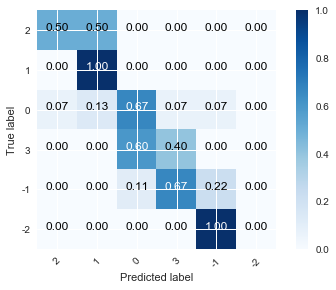

In [352]:
#thermal sensation
class_names = {'-2','-1','0','1','2','3'}
plot_confusion_matrix(matrix_sensation,classes=class_names,title='',normalize=True)

In [34]:
test = x.iloc[[0]]
clf.fit(x,y)
gt = y[0]
pred = clf.predict(test)
gt

-1

In [36]:
import pickle
filename = 'rf_model.sav'
filename2 = 'rf_model3.sav'
# python2
pickle.dump(clf,open(filename,'wb'),protocol=2)
# python3
pickle.dump(clf,open(filename2,'wb'))
load_model = pickle.load(open(filename,'rb'))
test['temperature']=30
pred = load_model.predict(test)
pred


/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([0])

In [34]:
%matplotlib inline
import seaborn as sns

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


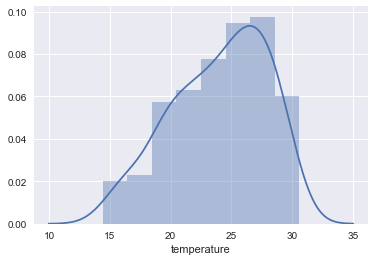

In [35]:
sns.distplot(x['temperature'])

In [36]:

best = 0
for i in range(18):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    score = cross_val_score(knn, x_clo, y, cv=5).mean()
    if score > best:
        best = score
    best_k = i+1
    
# best k is 18

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated

In [37]:
knn = KNeighborsClassifier(n_neighbors=18)
predicted = cross_val_predict(knn, x_clo, y, cv=5)
metrics.accuracy_score(y, predicted) 

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.5930232558139535

In [38]:
knn = KNeighborsClassifier(n_neighbors=18)
predicted = cross_val_predict(knn, x_clo, z, cv=5)
metrics.accuracy_score(z, predicted) 

0.37790697674418605